# 시계열 분석
## 시계열 데이터
순차적인 시간의 흐름에 따라 기록된 데이터를 의미<br>
Y = T + S + C + R 또는 Y + T X S X C X R <br>
- 추세 (Trend) : 시간의 흐름에 따라 점진적이고 지속적인 변화
- 계절성(Seasonality) : 특정 주기에 따라 일정한 패턴을 갖는 변화
- 싸이클(Cycle) : 경제 또는 사회적 요인에 의한 변화(예: 경기 변동)이며, 일정 주기가 없고 장기적인 변화
- 잔차(Residuals) : 설명할 수 없는 변화

## 시계열 분석의 특징
현재 시점의 시계열 데이터를 분석하는데 **이전 시간의 값이 현재에도 영향을 끼칠 것이라는 가정**하에 회귀분석을 진행

## 시계계열 분석 vs 단순 회귀

|시계열 분석|단순 회귀|
|---|---|
|자기 상관(Autocorrelation) 존재|자기 상관(Autocorrelation) 없음|
|대표적으로 자기회귀, 이동평균, 자기회귀누적이동평균, 벡터자기회귀 모델 등이 존재|독립변수와 종속변수는 서로 다른 변수일 경우가 많음|
|현재 시점에 가까운 데이터일 수록 서로 강한 관계를 맺는 경향 존재|선형 회귀로 시계열 데이터를 분석하려면 더 까다로운 가정 필요(선형성 가정이 필요)|

## 자기회귀 모델 (AR)
AR 모델은 시계열의 미대 값이 과거 값에 기반한다는 모델. 즉, 이전 값의 영향을 받는 것이 특징

## 이동평균 모델 (MA)
**전체적인 편향성**을 다루는 모델로, 설명변수가 **최근 오차항**으로만 **구성**되어 있는 것이 특징
> 이전 시점의 값에 기반하는 것이 아닌 이전 시점의 **예측 오차**에 **가중치**를 두어 **미래의 값**을 **예측**

## ARIMA 모델
AR과 MA를 동시에 고려하고, 누적(I)으로 추세까지 고려한 모델로, '자기회귀 누적 이동평균 모델'이라고도 불림<br>
> ARIMA(p, d, q) = AR(p) + I(d) + MA(q)

- AR이나 MA 모델 혼자로는 역동성을 설명하기엔 부족한 경우가 있음 -> ARMA 모델로 결합
- 정상성 만족을 위해 차분이 가미되면서 ARIMA가 됨

## 정상성
정상성을 나타내는 시계열은 관측치가 시간과 무관해야 함 (즉 시간에 상관없이 일정한 평균과 분산을 갖고 있어야 함)

## 시계열 분석 순서

![시계열 분석 순서](./data/1.png)

# 실습


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller  # ADF는 정상성 검정을 위해 사용
from statsmodels.tsa.seasonal import seasonal_decompose # 시계열 요소 분해
from statsmodels.tsa.arima.model import ARIMA # ARIMA 모델, SARIMA 모델

import pmdarima as pm # auto arima

## 정상성 vs 비정상성
### 정상성
정상성을 띄는 시계열은 해당 시계열이 관측된 시간과 무관 (즉, 시간에 따라 상승하거나 주기적인 변화가 있는 추세나 계절성이 없음)
- 특징
    - 정상 시계열은 평균이 일정
    - 분산이 시점에 의존하지 않음
    - 공분산은 시점에 의존하지 않음 (시차에는 의존)
- 정상성을 띄는 시계열은 장기적으로 예측 불가능한 시계열 (e.g. 백색잡음 white noise가 대표적인 예)

### 비정상성
시간에 영향을 받는 시계열 (추세나 계절성이 있는 것이 대표적인 특징)
- 특징
    - 시간의 흐름에 따라 시계열의 평균 수준이 다름
    - 시간의 흐름에 따라 추세를 가짐 (우상향, 우하향 추세 등)
    - 시간의 흐름에 따라 계절성이 있음
    - 시간의 흐름에 따라 시계열의 분산이 증가하거나 감소함
- 비정상 시계열 예제) 여름에 아이스크림 판매량이 높으며 겨울에 판매량이 낮다(계절성)

## 정상 시계열 - 백색잡음 (white noise)

In [2]:
np.random.seed(1)

x = np.random.randn(365)

### 원계열 시도표 (Time Plot)

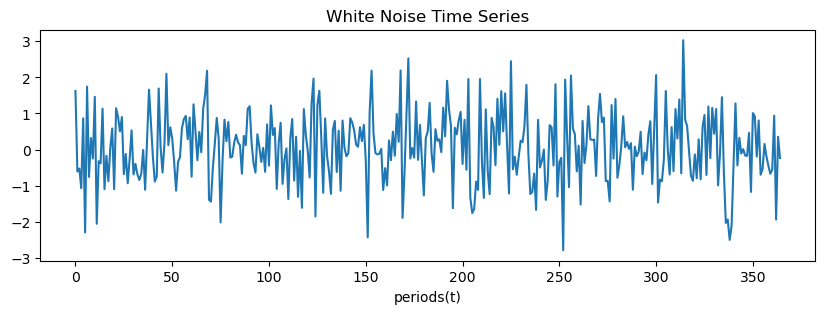

In [3]:
plt.figure(figsize=(10, 3))

plt.plot(np.arange(365), x)
plt.title('White Noise Time Series')
plt.xlabel('periods(t)')
plt.show()

### Augmented Dickey Fuller Test 단위근 검정 (ADF test)
- $H_0$ : 정상성이 있는 시계열이 아님 (단위근)
- $H_1$ : 정상성이 있는 시계열
- 귀무가설을 기각해야 정상성이 있는 시계열

In [4]:
result = adfuller(x)
result

(-19.77252320210403,
 0.0,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 952.9340604979548)

In [5]:
print('ADF stat : {:.4f}'.format(result[0]))
print('p-value : {:.4f}'.format(result[1]))
print('Critical Values : ')
for key, value in result[4].items():
    print('\t{} : {:.4f}'.format(key, value))

ADF stat : -19.7725
p-value : 0.0000
Critical Values : 
	1% : -3.4484
	5% : -2.8695
	10% : -2.5710


### ACF와 PACF

c:\Users\zxwlg\miniconda3\envs\dx_env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


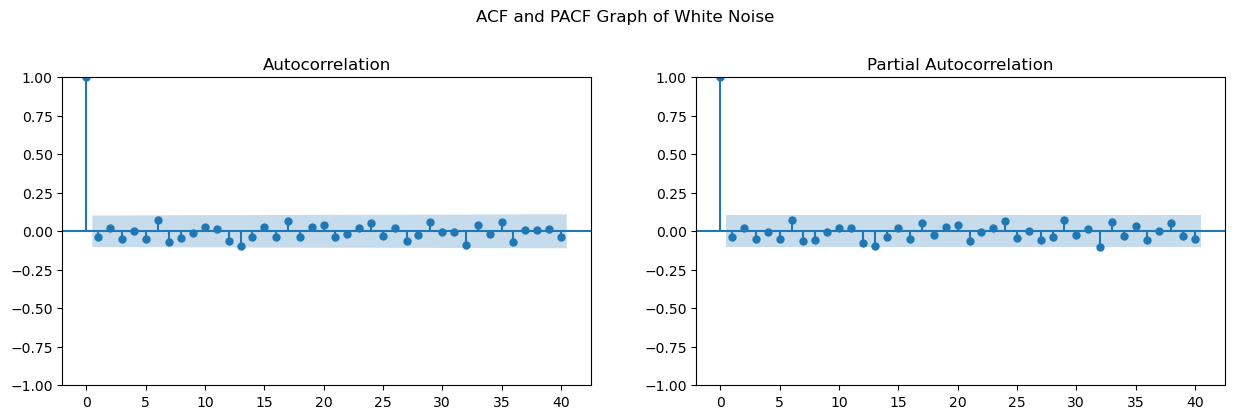

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=axes[1])
fig.suptitle('ACF and PACF Graph of White Noise', y=1.05)
plt.show()

자기상관 및 편자기상관 없음 -> 정상성
## 비정상성 시계열 (추세 존재)

In [8]:
trend = np.linspace(1, 15, 365) # 추세 생성
x_w_trend = x + trend # 백색잡음 x에 추세 추가

### 원계열 시도표 (Time Plot)

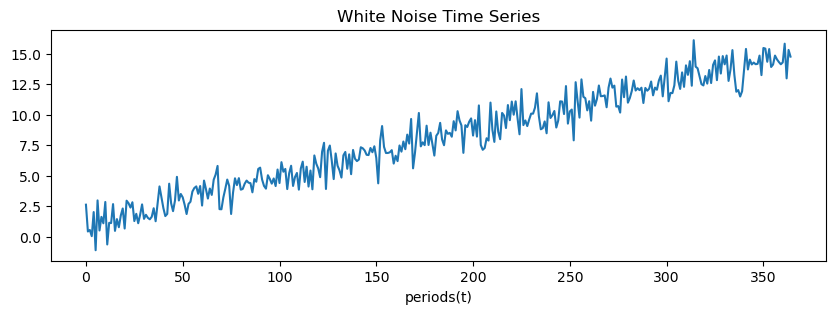

In [9]:
plt.figure(figsize=(10, 3))

plt.plot(np.arange(365), x_w_trend)
plt.title('White Noise Time Series')
plt.xlabel('periods(t)')
plt.show()

### Augmented Dickey Fuller Test 단위근 검정 (ADF test)
- $H_0$ : 정상성이 있는 시계열이 아님 (단위근)
- $H_1$ : 정상성이 있는 시계열
- 귀무가설을 기각해야 정상성이 있는 시계열

In [10]:
result = adfuller(x_w_trend)
print('ADF stat : {:.4f}'.format(result[0]))
print('p-value : {:.4f}'.format(result[1]))
print('Critical Values : ')
for key, value in result[4].items():
    print('\t{} : {:.4f}'.format(key, value))

ADF stat : -0.7079
p-value : 0.8447
Critical Values : 
	1% : -3.4493
	5% : -2.8699
	10% : -2.5712


결론 : 귀무가설 기각 실패 -> 정상성 만족 x
### ACF와 PACF

c:\Users\zxwlg\miniconda3\envs\dx_env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


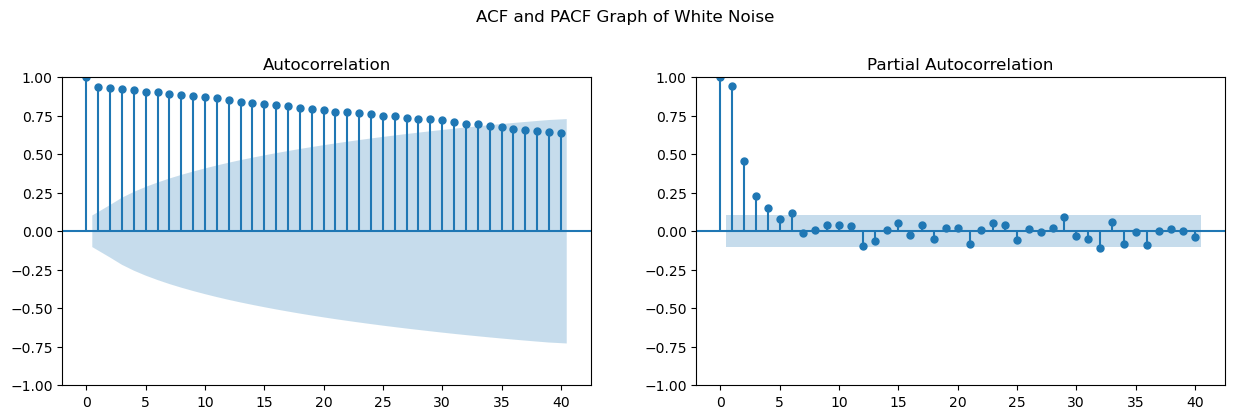

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

fig = sm.graphics.tsa.plot_acf(x_w_trend, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(x_w_trend, lags=40, ax=axes[1])
fig.suptitle('ACF and PACF Graph of White Noise', y=1.05)
plt.show()

자기상관(Autocorrelation)은 시간이 흐를수록 줄어들고 있음 (파란 음영 부분 안으로 들어옴) & 편자기상관(Partial Autocorrelation)은 시차 5번째부터 파란 음영부분으로 들어왔음
### ARIMA -- AR(5)

In [13]:
arima_mod = ARIMA(x_w_trend, order=(5, 0, 0)) # AR order만 5, 따라서 AR(5) 모델임

In [14]:
result = arima_mod.fit()

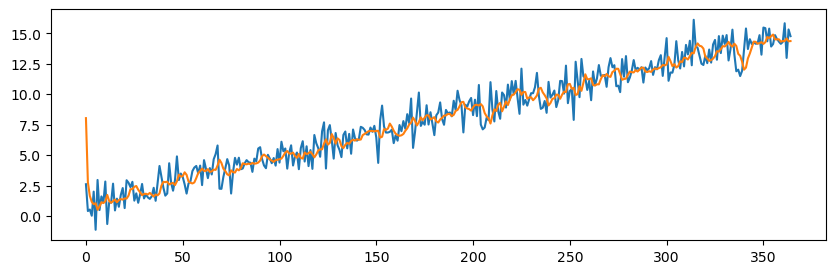

In [15]:
plt.figure(figsize=(10, 3))

plt.plot(np.arange(365), x_w_trend)
plt.plot(np.arange(365), result.fittedvalues)
plt.show()

In [16]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -545.109
Date:                Tue, 31 Jan 2023   AIC                           1104.217
Time:                        17:54:46   BIC                           1131.516
Sample:                             0   HQIC                          1115.066
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0428      5.053      1.592      0.111      -1.861      17.947
ar.L1          0.1981      0.048      4.106      0.000       0.104       0.293
ar.L2          0.2489      0.052      4.796      0.0

In [17]:
print('mean absolute error : {}'.format(result.mae))

mean absolute error : 0.8551272105200026


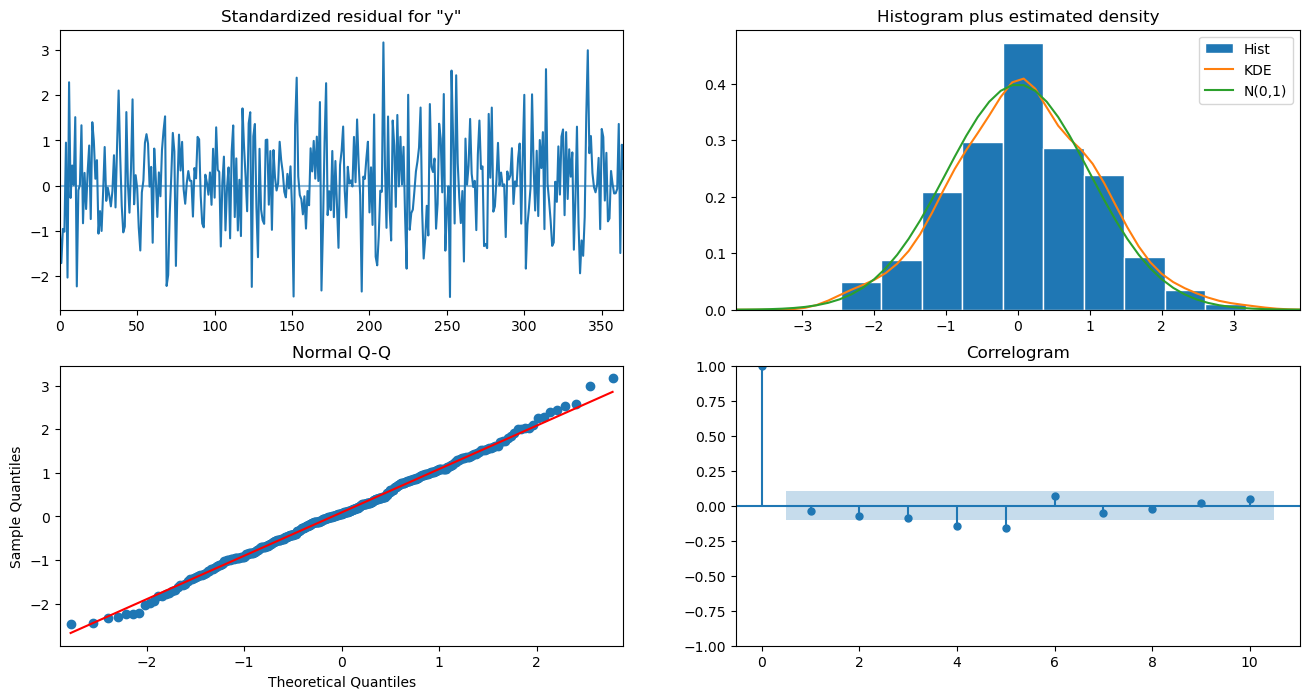

In [18]:
result.plot_diagnostics(figsize=(16, 8))
plt.show()

### ARIMA -- I(1)

In [19]:
arima_mod2 = ARIMA(x_w_trend, order=(0, 1, 0))
result = arima_mod2.fit()

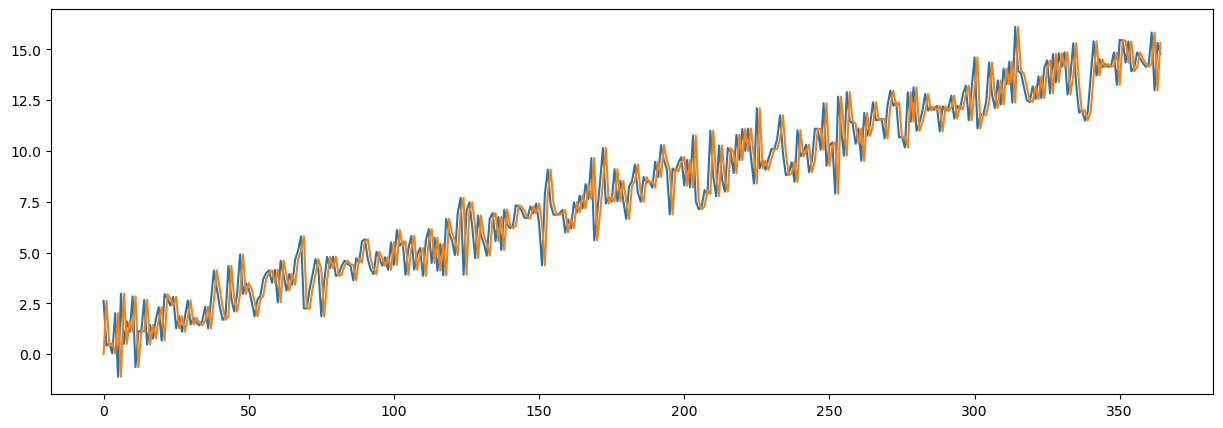

In [20]:
plt.figure(figsize=(15, 5))

plt.plot(np.arange(365), x_w_trend)
plt.plot(np.arange(365), result.fittedvalues)
plt.show()

In [21]:
i_1 = np.sum(np.abs(np.abs(x_w_trend - result.fittedvalues)))
i_1

398.3766694444225

In [22]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -634.642
Date:                Tue, 31 Jan 2023   AIC                           1271.284
Time:                        17:59:25   BIC                           1275.181
Sample:                             0   HQIC                          1272.833
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.9139      0.130     14.755      0.000       1.660       2.168
Ljung-Box (L1) (Q):                 100.83   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.00   Pr

In [23]:
print('mean absolute error : {}'.format(result.mae))

mean absolute error : 1.091442929984719


In [24]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(x_w_trend, result.fittedvalues)
print('mean absolute error : {}'.format(mae))

mean absolute error : 1.091442929984719


### PM

In [25]:
pm.arima.auto_arima(
    x_w_trend,
    d=1,
    start_p=0,
    max_p=5,
    start_q=0,
    max_q=5,
    seasonal=False,
    step=True,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1273.072, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1157.411, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1271.284, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1125.228, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1101.074, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1092.347, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1071.004, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1075.303, Time=0.05 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0] intercept
Total fit time: 1.271 seconds


ARIMA(maxiter=50, method='lbfgs', order=(5, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [26]:
arima_mod3 = ARIMA(x_w_trend, order=(5, 1, 0))
result = arima_mod3.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -531.651
Date:                Tue, 31 Jan 2023   AIC                           1075.303
Time:                        18:02:31   BIC                           1098.686
Sample:                             0   HQIC                          1084.596
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8423      0.047    -17.886      0.000      -0.935      -0.750
ar.L2         -0.6425      0.069     -9.352      0.000      -0.777      -0.508
ar.L3         -0.5129      0.067     -7.630      0.0

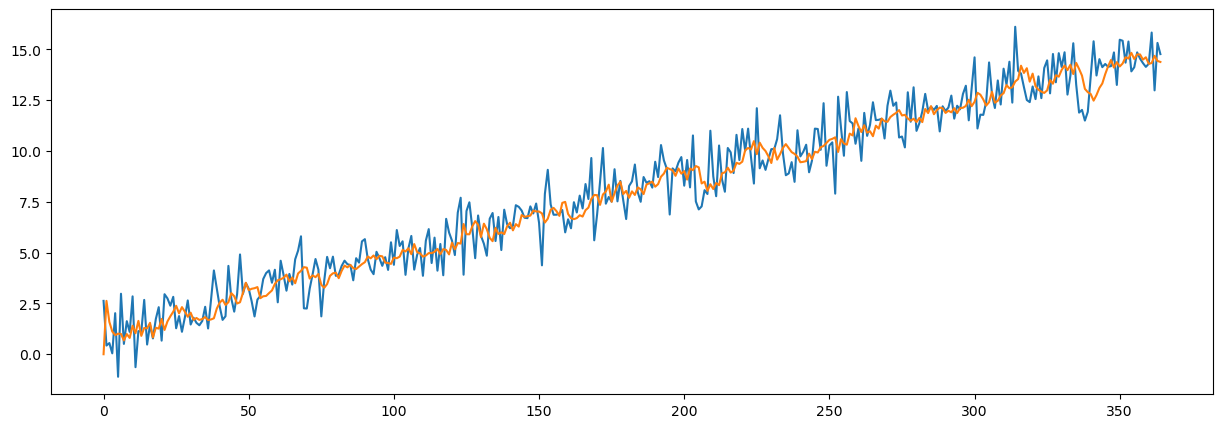

In [27]:
plt.figure(figsize=(15, 5))

plt.plot(np.arange(365), x_w_trend)
plt.plot(np.arange(365), result.fittedvalues)
plt.show()

In [28]:
print('mean absolute error : {}'.format(result.mae))

mean absolute error : 0.8300001373295226


## 시계열 성분 분해 (Time Series Decomposition)
샘플 데이터 필요

In [ ]:
df = pd.read_csv('./data/latte_ice_cream.csv')
df

In [ ]:
df['time'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['date'].astype(str))
df

In [ ]:
df = df.set_index('time', drop=True)
df

In [ ]:
ts = df['sales_amount']
ts

### 시도표 (Time Plot)

In [ ]:
ts.plot(figsize=(10, 3))
plt.show()

시도표를 보며 생각해볼 점.
1. 추세는 어떠한가? 우상향인가? 우하향인가?
2. 계절성은 어떠한가? 반복되는 패턴이 있는가?
3. 분산은 어떠한가? 시간의 흐름에 상관없이 일정한가? 아니면 증가하는가?
### ACF와 PACF

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=axes[1])

plt.show()

생각해볼점 : 자기상관의 패턴은 어떠한가? 또한, 편 자기상관의 패턴은 어떠한가?
### 계절성 분해(seasonal_decompose)

In [ ]:
decomp = seasonal_decompose(ts, model='additive', period=12)

fig = decomp.plot()
fig.set_size_inches((12, 8))

분해 후 남은 잔차(Resid)를 살펴보자. 시간의 흐름에 따라 동일한가 (homoskedastic)? 증가하는가/감소하는가 (heteroskedastic)?

In [ ]:
decomp = seasonal_decompose(ts, model='multiplicative', period=12)

fig = decomp.plot()
fig.set_size_inches((12, 8))

분해 후 남은 잔차(Resid)를 살펴보자. 시간의 흐름에 따라 동일한가 (homoskedastic)? 증가하는가/감소하는가 (heteroskedastic)?
### SARIMAX : ARIMA + 계절성 (S) = SARIMA

In [ ]:
s_mod = sm.tsa.statespace.SARIMAX(ts, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))

In [ ]:
result = s_mod.fit()
print(result.summary())

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(ts)
plt.plot(result.fittedvalues, color='r')
plt.show()

In [ ]:
pm.arima.auto_arima(
    ts,
    d=1,
    start_p=0,
    max_p=5,
    start_q=0,
    max_q=5,
    D=1,
    m=12,
    seasonal=True,
    step=True,
    trace=True
)

In [ ]:
s_mod = sm.tsa.statespace.SARIMAX(ts, order=(0, 1, 1), seasonal_order=(1, 1, 2, 12))

In [ ]:
result = s_mod.fit()
print(result.summary())

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(ts)
plt.plot(result.fittedvalues, color='r')
plt.show()